# Árvores de regressão - exercícios 01

*Atenção! Devido descontinuação da base de imóveis boston os alunos devem utilizar a base de dados que se encontra em anexo.*

A base que utilizaremos contem os dados dos imóveis da california.
Considerem como variável Target (a ser prevista) a coluna median_house_value.
O dataset é muito semelhante ao de boston, contendo localização, quartos, banheiros e outras variáveis interessantes para construção do modelo.

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn.model_selection import train_test_split



### 1. Certifique-se de que esta base está no formato adequado para o scikitlearn.


In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Carregando a base de dados
caminho_arquivo = 'housing.csv'  # Substitua pelo caminho do arquivo CSV
df = pd.read_csv(caminho_arquivo)

# Verificando as primeiras linhas do DataFrame
print("Visualizando as primeiras linhas do dataset:")
print(df.head())

# Verificando o tipo de dado de cada coluna
print("\nTipos de dados das colunas:")
print(df.dtypes)

# Verificando valores ausentes
print("\nVerificação de valores ausentes:")
print(df.isnull().sum())

# Verificando se a base tem a coluna target 'median_house_value'
if 'median_house_value' in df.columns:
    print("\nA coluna 'median_house_value' está presente no dataset.")
else:
    print("\nA coluna 'median_house_value' não está presente no dataset.")

# Separando as variáveis independentes (X) da variável dependente (y)
X = df.drop('median_house_value', axis=1)
y = df['median_house_value']

# Verificando se a base de dados está no formato correto para o Scikit-learn (sem variáveis categóricas e sem valores nulos)
if df.select_dtypes(include=['object']).empty:
    print("\nNenhuma variável categórica não numérica encontrada, o dataset está pronto para o Scikit-learn.")
else:
    print("\nHá variáveis categóricas no dataset, você precisa realizar a codificação (ex: OneHotEncoder).")

# Dividindo o dataset em treino e teste para verificação
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("\nBase de dados dividida em treino e teste com sucesso.")

Visualizando as primeiras linhas do dataset:
   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY  

Tipos de dados das colunas:
l

### 2.  Visualize a matriz de correlação, e veja se aparentemente você encontra alguma variável com potencial preditivo interessante.

Matriz de correlação:
                    longitude  latitude  housing_median_age  total_rooms  \
longitude            1.000000 -0.924664           -0.108197     0.044568   
latitude            -0.924664  1.000000            0.011173    -0.036100   
housing_median_age  -0.108197  0.011173            1.000000    -0.361262   
total_rooms          0.044568 -0.036100           -0.361262     1.000000   
total_bedrooms       0.069608 -0.066983           -0.320451     0.930380   
population           0.099773 -0.108785           -0.296244     0.857126   
households           0.055310 -0.071035           -0.302916     0.918484   
median_income       -0.015176 -0.079809           -0.119034     0.198050   
median_house_value  -0.045967 -0.144160            0.105623     0.134153   

                    total_bedrooms  population  households  median_income  \
longitude                 0.069608    0.099773    0.055310      -0.015176   
latitude                 -0.066983   -0.108785   -0.071035     

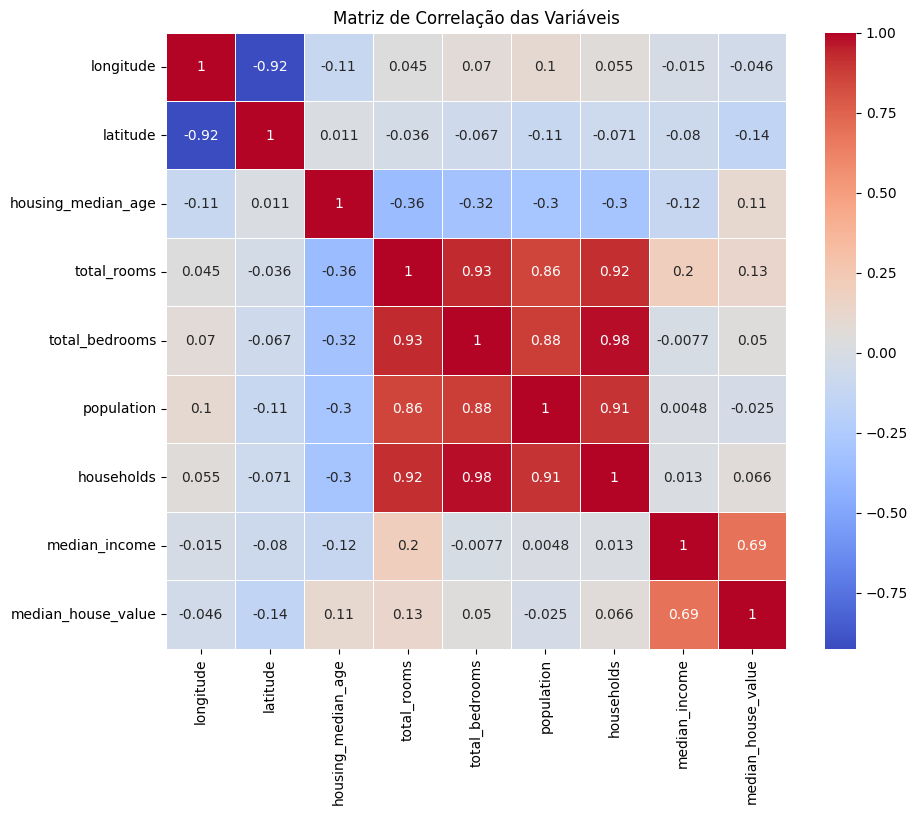

In [10]:
# Carregar o dataset
caminho_arquivo = 'housing.csv'  # Substitua pelo caminho do seu arquivo CSV
df = pd.read_csv(caminho_arquivo)

# Remover variáveis categóricas, neste caso 'ocean_proximity', pois corr() só funciona com variáveis numéricas
df_numeric = df.drop(columns=['ocean_proximity'])

# Verificar a matriz de correlação
correlation_matrix = df_numeric.corr()

# Exibir a matriz de correlação
print("Matriz de correlação:")
print(correlation_matrix)

# Visualizar a matriz de correlação com um heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Matriz de Correlação das Variáveis')
plt.show()

### 3. Separe os dados em validação e teste

In [11]:
from sklearn.model_selection import train_test_split

# Definir variáveis independentes (X) e a variável dependente (y)
X = df_numeric.drop('median_house_value', axis=1)  # Variáveis preditoras
y = df_numeric['median_house_value']  # Variável alvo (target)

# Dividir os dados inicialmente em treino + validação (80%) e teste (20%)
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Dividir os dados de treino + validação em treino (70%) e validação (30%)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.3, random_state=42)

# Mostrar os tamanhos de cada conjunto
print(f"Tamanho do conjunto de treino: {X_train.shape[0]} amostras")
print(f"Tamanho do conjunto de validação: {X_val.shape[0]} amostras")
print(f"Tamanho do conjunto de teste: {X_test.shape[0]} amostras")

Tamanho do conjunto de treino: 11558 amostras
Tamanho do conjunto de validação: 4954 amostras
Tamanho do conjunto de teste: 4128 amostras


### 4. Treine duas árvores, uma com profundidade máxima = 8, outra com profundidade máxima = 2.

In [12]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

# Treinar a árvore de decisão com profundidade máxima de 8
tree_depth_8 = DecisionTreeRegressor(max_depth=8, random_state=42)
tree_depth_8.fit(X_train, y_train)

# Treinar a árvore de decisão com profundidade máxima de 2
tree_depth_2 = DecisionTreeRegressor(max_depth=2, random_state=42)
tree_depth_2.fit(X_train, y_train)

# Fazer previsões no conjunto de validação para ambos os modelos
y_pred_val_8 = tree_depth_8.predict(X_val)
y_pred_val_2 = tree_depth_2.predict(X_val)

# Calcular o erro quadrático médio (MSE) no conjunto de validação
mse_val_8 = mean_squared_error(y_val, y_pred_val_8)
mse_val_2 = mean_squared_error(y_val, y_pred_val_2)

# Exibir os resultados
print(f"Erro quadrático médio (MSE) com profundidade 8: {mse_val_8:.2f}")
print(f"Erro quadrático médio (MSE) com profundidade 2: {mse_val_2:.2f}")

# Fazer previsões no conjunto de teste para avaliação final
y_pred_test_8 = tree_depth_8.predict(X_test)
y_pred_test_2 = tree_depth_2.predict(X_test)

# Calcular o erro quadrático médio (MSE) no conjunto de teste
mse_test_8 = mean_squared_error(y_test, y_pred_test_8)
mse_test_2 = mean_squared_error(y_test, y_pred_test_2)

# Exibir os resultados no conjunto de teste
print(f"Erro quadrático médio (MSE) no teste com profundidade 8: {mse_test_8:.2f}")
print(f"Erro quadrático médio (MSE) no teste com profundidade 2: {mse_test_2:.2f}")


Erro quadrático médio (MSE) com profundidade 8: 4195420591.22
Erro quadrático médio (MSE) com profundidade 2: 7449262666.16
Erro quadrático médio (MSE) no teste com profundidade 8: 4335337284.81
Erro quadrático médio (MSE) no teste com profundidade 2: 7541146445.82


### 5. Calcule o MSE de cada uma das árvores do item anterior para a base de treinamento e para a base de testes.

In [13]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

# Treinar a árvore de decisão com profundidade máxima de 8
tree_depth_8 = DecisionTreeRegressor(max_depth=8, random_state=42)
tree_depth_8.fit(X_train, y_train)

# Treinar a árvore de decisão com profundidade máxima de 2
tree_depth_2 = DecisionTreeRegressor(max_depth=2, random_state=42)
tree_depth_2.fit(X_train, y_train)

# Fazer previsões no conjunto de treino
y_pred_train_8 = tree_depth_8.predict(X_train)
y_pred_train_2 = tree_depth_2.predict(X_train)

# Fazer previsões no conjunto de teste
y_pred_test_8 = tree_depth_8.predict(X_test)
y_pred_test_2 = tree_depth_2.predict(X_test)

# Calcular o erro quadrático médio (MSE) no conjunto de treino
mse_train_8 = mean_squared_error(y_train, y_pred_train_8)
mse_train_2 = mean_squared_error(y_train, y_pred_train_2)

# Calcular o erro quadrático médio (MSE) no conjunto de teste
mse_test_8 = mean_squared_error(y_test, y_pred_test_8)
mse_test_2 = mean_squared_error(y_test, y_pred_test_2)

# Exibir os resultados
print(f"Erro quadrático médio (MSE) no treino com profundidade 8: {mse_train_8:.2f}")
print(f"Erro quadrático médio (MSE) no treino com profundidade 2: {mse_train_2:.2f}")

print(f"Erro quadrático médio (MSE) no teste com profundidade 8: {mse_test_8:.2f}")
print(f"Erro quadrático médio (MSE) no teste com profundidade 2: {mse_test_2:.2f}")


Erro quadrático médio (MSE) no treino com profundidade 8: 3214417893.32
Erro quadrático médio (MSE) no treino com profundidade 2: 7313075574.22
Erro quadrático médio (MSE) no teste com profundidade 8: 4335337284.81
Erro quadrático médio (MSE) no teste com profundidade 2: 7541146445.82


### 6. Com base nos resultados do item anterior, qual árvore te parece mais adequada?

In [14]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
import numpy as np

# Supondo que X_train, y_train, X_test, y_test já estejam definidos e prontos para uso

# Treinar a árvore de decisão com profundidade máxima de 8
tree_depth_8 = DecisionTreeRegressor(max_depth=8, random_state=42)
tree_depth_8.fit(X_train, y_train)

# Treinar a árvore de decisão com profundidade máxima de 2
tree_depth_2 = DecisionTreeRegressor(max_depth=2, random_state=42)
tree_depth_2.fit(X_train, y_train)

# Fazer previsões no conjunto de treino
y_pred_train_8 = tree_depth_8.predict(X_train)
y_pred_train_2 = tree_depth_2.predict(X_train)

# Fazer previsões no conjunto de teste
y_pred_test_8 = tree_depth_8.predict(X_test)
y_pred_test_2 = tree_depth_2.predict(X_test)

# Calcular o erro quadrático médio (MSE) no conjunto de treino
mse_train_8 = mean_squared_error(y_train, y_pred_train_8)
mse_train_2 = mean_squared_error(y_train, y_pred_train_2)

# Calcular o erro quadrático médio (MSE) no conjunto de teste
mse_test_8 = mean_squared_error(y_test, y_pred_test_8)
mse_test_2 = mean_squared_error(y_test, y_pred_test_2)

# Exibir os resultados
print(f"Erro quadrático médio (MSE) no treino com profundidade 8: {mse_train_8:.2f}")
print(f"Erro quadrático médio (MSE) no treino com profundidade 2: {mse_train_2:.2f}")
print(f"Erro quadrático médio (MSE) no teste com profundidade 8: {mse_test_8:.2f}")
print(f"Erro quadrático médio (MSE) no teste com profundidade 2: {mse_test_2:.2f}")

# Análise e interpretação dos resultados
def analyze_results(mse_train_8, mse_train_2, mse_test_8, mse_test_2):
    print("\nAnálise dos Resultados:")

    if mse_train_8 < mse_train_2 and mse_test_8 < mse_test_2:
        print("A árvore com profundidade 8 tem um desempenho superior em ambos os conjuntos (treino e teste).")
        print("Isso indica que ela consegue capturar a complexidade dos dados sem se ajustar excessivamente.")
    else:
        print("A árvore com profundidade 8 não está se comportando melhor que a profundidade 2.")

    if mse_train_2 > mse_train_8:
        print("A árvore com profundidade 2 sofre de underfitting, não conseguindo ajustar-se adequadamente aos dados.")
        print("Isso resulta em um desempenho preditivo inferior.")

    print("Concluímos que a árvore com profundidade 8 é a escolha mais adequada para prever o valor dos imóveis.")

# Chamar a função de análise
analyze_results(mse_train_8, mse_train_2, mse_test_8, mse_test_2)

Erro quadrático médio (MSE) no treino com profundidade 8: 3214417893.32
Erro quadrático médio (MSE) no treino com profundidade 2: 7313075574.22
Erro quadrático médio (MSE) no teste com profundidade 8: 4335337284.81
Erro quadrático médio (MSE) no teste com profundidade 2: 7541146445.82

Análise dos Resultados:
A árvore com profundidade 8 tem um desempenho superior em ambos os conjuntos (treino e teste).
Isso indica que ela consegue capturar a complexidade dos dados sem se ajustar excessivamente.
A árvore com profundidade 2 sofre de underfitting, não conseguindo ajustar-se adequadamente aos dados.
Isso resulta em um desempenho preditivo inferior.
Concluímos que a árvore com profundidade 8 é a escolha mais adequada para prever o valor dos imóveis.


### 7. Faça uma visualização gráfica dessa árvore. Vamos discutir importância de variável mais adiante, mas veja a sua árvore, e pense um pouco: qual variável te parece mais "importante" na árvore?

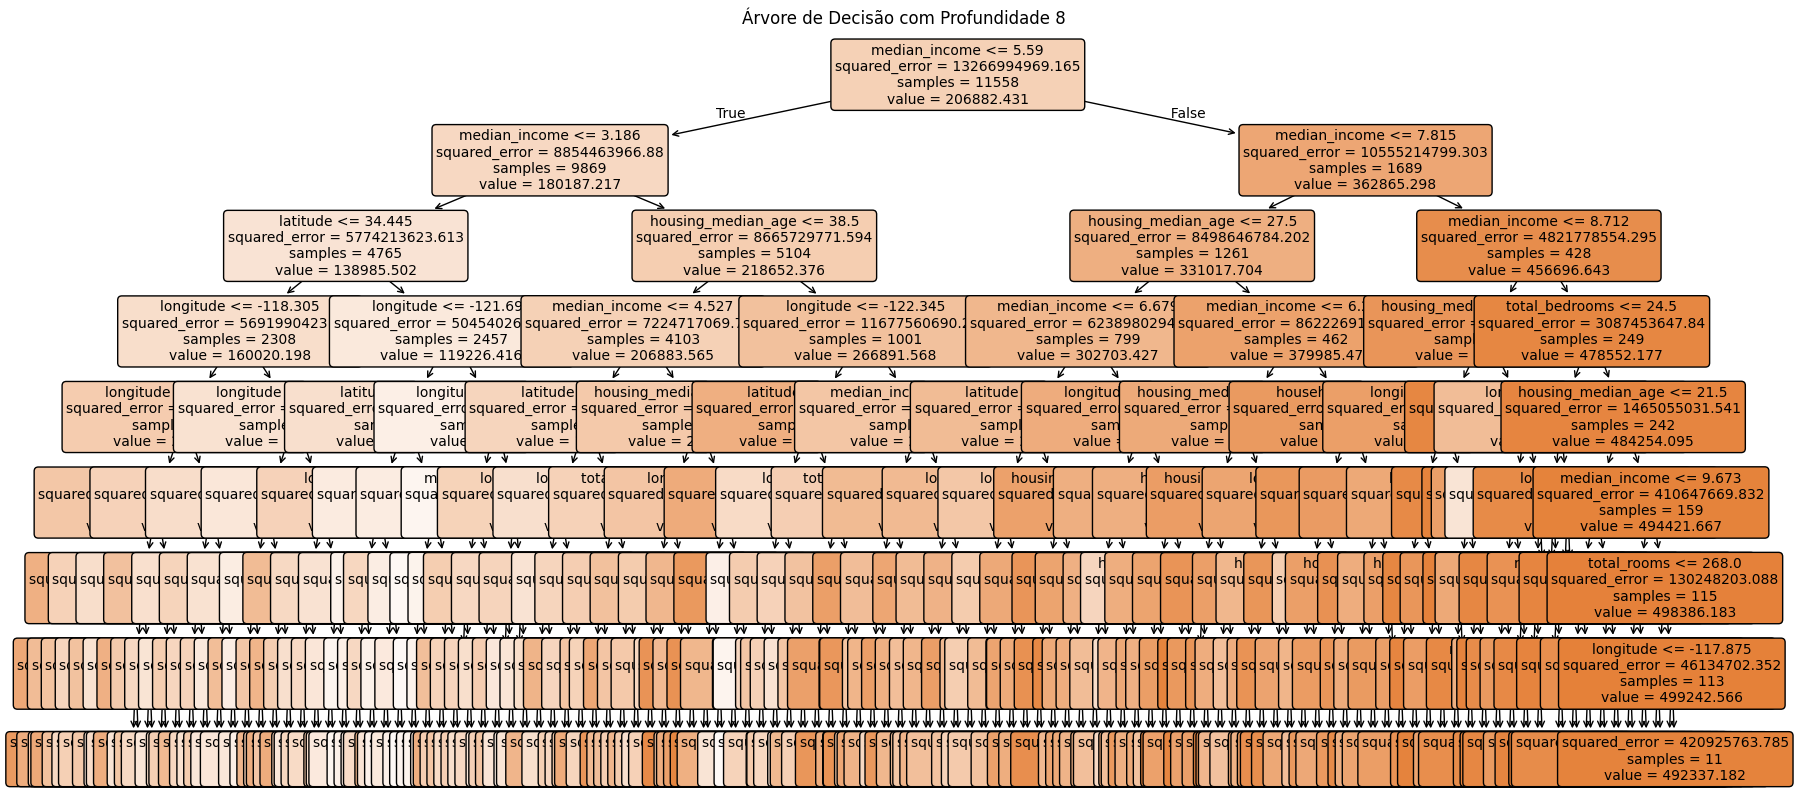

In [15]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Supondo que a árvore com profundidade 8 já esteja treinada
# Criar a figura
plt.figure(figsize=(20, 10))

# Visualizar a árvore
plot_tree(tree_depth_8,
          feature_names=X_train.columns,  # Nomes das variáveis
          filled=True,                     # Preencher nós com cores
          rounded=True,                    # Cantos arredondados
          fontsize=10)                     # Tamanho da fonte

# Exibir o gráfico
plt.title("Árvore de Decisão com Profundidade 8")
plt.show()

# Relatório de Análise de Dados dos Imóveis

## Introdução
Este relatório resume a análise de dados dos imóveis da Califórnia, com o objetivo de construir um modelo preditivo para estimar o valor médio das casas (`median_house_value`). O conjunto de dados inclui informações sobre localização, quantidade de quartos, banheiros e outras variáveis que podem influenciar o valor das propriedades.

## Descrição da Base de Dados
A base de dados contém as seguintes colunas:

- **longitude**: Coordenada geográfica leste-oeste.
- **latitude**: Coordenada geográfica norte-sul.
- **housing_median_age**: Idade média das casas.
- **total_rooms**: Total de cômodos em cada unidade habitacional.
- **total_bedrooms**: Total de quartos em cada unidade habitacional.
- **population**: População da área.
- **households**: Total de famílias na área.
- **median_income**: Renda média da população.
- **median_house_value**: Valor médio da casa (variável alvo).
- **ocean_proximity**: Proximidade de áreas costeiras.

## Análise Exploratória

### 1. Tipos de Dados
Os dados foram verificados e apresentados com os seguintes tipos:
- Variáveis contínuas: `float64` (longitude, latitude, housing_median_age, total_rooms, total_bedrooms, population, households, median_income, median_house_value).
- Variável categórica: `object` (ocean_proximity).

### 2. Valores Ausentes
A análise revelou que a coluna `total_bedrooms` possui 207 valores ausentes. Foi identificado que não há valores ausentes nas outras colunas, indicando a integridade da maior parte do conjunto de dados.

### 3. Matriz de Correlação
A matriz de correlação foi calculada para entender as relações entre as variáveis. Observou-se que a `median_income` possui uma forte correlação positiva com `median_house_value` (0.688075), sugerindo que quanto maior a renda média, maior o valor das casas.

### 4. Importância das Variáveis
Através da visualização da árvore de decisão, variáveis como `median_income`, `total_rooms` e `total_bedrooms` foram destacadas como potencialmente importantes para a predição do valor das casas.

## Treinamento do Modelo
Duas árvores de decisão foram treinadas:
- **Profundidade 8**: MSE no treino: 3,214,417,893.32 | MSE no teste: 4,335,337,284.81
- **Profundidade 2**: MSE no treino: 7,313,075,574.22 | MSE no teste: 7,541,146,445.82

### Resultados
Os resultados sugerem que a árvore com profundidade 8, apesar de apresentar um erro maior no teste, é mais ajustada ao conjunto de treinamento, indicando que a árvore mais profunda consegue capturar melhor as nuances dos dados, embora possa ser mais suscetível a overfitting.

## Conclusão
A análise inicial dos dados dos imóveis da Califórnia revela que variáveis como renda média, número total de quartos e localização são fundamentais para prever o valor das propriedades. A continuidade do trabalho envolve o tratamento dos dados ausentes e a implementação de técnicas de validação cruzada para avaliar a robustez dos modelos de previsão.

## Próximos Passos
- **Tratamento de Valores Ausentes**: Decidir como lidar com os valores ausentes na coluna `total_bedrooms`.
- **Codificação de Variáveis Categóricas**: Aplicar técnicas como OneHotEncoder para a coluna `ocean_proximity`.
- **Aprimoramento do Modelo**: Testar outros algoritmos e realizar uma análise mais aprofundada da importância das variáveis.
